### Convolutional Neural Networks
It's a deep, feed-forward artificial neural network. The models are called "feed-forward" because information flows right through the model. There are no feedback connections in which outputs of the model are fed back into itself. The reason of CNN is the researchers showed that some individual neurons in the brain activated or fired only in the presence of edges of a particular orientation like vertical or horizontal edges.
Example: 
<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1512486717/Typical_cnn_kecdep.png">
<ul>
    <li>Covolution: extraction of a feature map from the input image. In other words, imagine you have an image represented as a 5x5 matrix of values, and you take a 3x3 matrix and slide that 3x3 window around the image. At each position of that matrix, you multiply the values of your 3x3 window by the values in the image that are currently being covered by the window. As a result, you'll get a single number that represents all the values in that window of the images. <b>Famous Technique: Filtering</b></li>
    <li>Subsampling: is to get an input representation by reducing its dimensions, which helps in reducing overfitting. <b>Famous Technique: Max Pooling</b>(you select the highest pixel value from a region depending on its size.  For example, you can have a max-pooling layer of size 2 x 2 will select the maximum pixel intensity value from 2 x 2 region.)</li>
    <li>Fully Connected: to flatten the high-level features that are learned by convolutional layers and combining all the features and pass to the output</li>
</ul>

#### Load the data
The train and test images along with the labels are loaded and stored in variables train_X, train_Y, test_X, test_Y, respectively.

In [15]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

#### Analyze data

In [16]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)
#Training data shape :  (60000, 28, 28) (60000,) = there are 60,000 training samples each of 28 x 28 dimension

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


From the above output, you can see that the training data has a shape of 60000 x 28 x 28 since there are 60,000 training samples each of 28 x 28 dimension. Similarly, the test data has a shape of 10000 x 28 x 28 since there are 10,000 testing samples.

In [17]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


There's also a total of ten output classes that range from 0 to 9.

Image in dataset:

Text(0.5, 1.0, 'Ground Truth : 9')

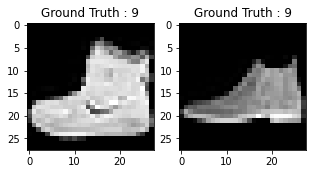

In [18]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

#Ground Truth: 9 = Class 9 (Classifies the similar product within one class)

The output of above two plots looks like an ankle boot, and this class is assigned a class label of 9. Similarly, other fashion products will have different labels, but similar products will have same labels.

#### Data Processing
As a first step, convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1 which is fed into the network.

In [19]:
#convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1 which is fed into the network.
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

The data right now is in an int8 format, so before you feed it into the network you need to convert its type to float32, and you also have to rescale the pixel values in range 0 - 1 inclusive.

In [20]:
#convert its type to float32 and rescale the pixel values in range 0 - 1 inclusive
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

Convert the class labels into a one-hot encoding vector because machine learning algorithms cannot work with categorical data directly.
For example, the ankle boot image that you plotted above has a label of 9, so for all the ankle boot images, the one hot encoding vector would be <code>[0 0 0 0 0 0 0 0 1 0]</code>

In [21]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


For the model to generalize well, you split the training data into two parts, one designed for training and another one for validation. In this case, you will train the model on 80% of the training data and validate it on 20% of the remaining training data.

In [22]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

#### The Network
The images are of size 28 x 28. You convert the image matrix to an array, rescale it between 0 and 1, reshape it so that it's of size 28 x 28 x 1, and feed this as an input to the network.

You'll use three convolutional layers:
<ul>
    <li>The first layer will have 32- all 3 x 3 filters,</li>
    <li>The second layer will have 64- all 3 x 3 filters and</li>
    <li>The third layer will have 128- all 3 x 3 filters.</li>
</ul>
In addition, there are three max-pooling layers each of size 2 x 2.

##### Model the data
import neccessary module

In [23]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

batch_size = 64
epochs = 20
num_classes = 10

##### Building Neural Network
<ul>
    <li>first add a first convolutional layer with Conv2D(). Note that you use this function because you're working with images!</li>
    <li>Next, you add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries. Since you have ten different classes, you'll need a non-linear decision boundary that could separate these ten classes which are not linearly separable.</li>
    <li>Next, you'll add the max-pooling layer with MaxPooling2D() and so on.</li>
    <li>The last layer is a Dense layer that has a softmax activation function with 10 units, which is needed for this multi-class classification problem.</li>
</ul>

In [24]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

##### Compile the model

In [28]:
#compile the model
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

##### Visualize the layers

In [26]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

##### Train the model
The model trains for 20 epochs. It will return a history object. It will be used later to plot the accuracy and loss function plots between training and validation which will help you to analyze your model's performance visually.

In [27]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 36s 742us/step - loss: 0.4641 - accuracy: 0.8302 - val_loss: 0.3194 - val_accuracy: 0.8848
Epoch 2/20
48000/48000 [==============================] - 36s 752us/step - loss: 0.2863 - accuracy: 0.8954 - val_loss: 0.2696 - val_accuracy: 0.9000
Epoch 3/20
48000/48000 [==============================] - 37s 761us/step - loss: 0.2411 - accuracy: 0.9113 - val_loss: 0.2421 - val_accuracy: 0.9128
Epoch 4/20
48000/48000 [==============================] - 36s 747us/step - loss: 0.2102 - accuracy: 0.9222 - val_loss: 0.2374 - val_accuracy: 0.9137
Epoch 5/20
48000/48000 [==============================] - 36s 748us/step - loss: 0.1864 - accuracy: 0.9307 - val_loss: 0.2274 - val_accuracy: 0.9193
Epoch 6/20
48000/48000 [==============================] - 36s 754us/step - loss: 0.1619 - accuracy: 0.9403 - val_loss: 0.2365 - val_accuracy: 0.9183
Epoch 7/20
48000/48000 [==============================] 

The model is overfitting, as the validation loss is 0.4396 and the validation accuracy is 92%. Overfitting gives an intuition that the network has memorized the training data very well but is not guaranteed to work on unseen data.

##### Model Evaluation on the Test Set

In [29]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.453211013947404
Test accuracy: 0.9180999994277954


##### Add a dropout layer to overcome the problem of overfitting. 
It turns off a fraction of neurons during the training process, reducing the dependency on the training set by some amount. How many fractions of neurons you want to turn off is decided by a hyperparameter, which can be tuned accordingly. This way, turning off some neurons will not allow the network to memorize the training data since not all the neurons will be active at the same time and the inactive neurons will not be able to learn anything.

In [31]:
batch_size = 64
epochs = 20
num_classes = 10

In [32]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [33]:
fashion_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)         

In [35]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [36]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 42s 867us/step - loss: 0.5983 - accuracy: 0.7771 - val_loss: 0.3812 - val_accuracy: 0.8656
Epoch 2/20
48000/48000 [==============================] - 40s 840us/step - loss: 0.3736 - accuracy: 0.8610 - val_loss: 0.3174 - val_accuracy: 0.8843
Epoch 3/20
48000/48000 [==============================] - 41s 846us/step - loss: 0.3273 - accuracy: 0.8805 - val_loss: 0.2819 - val_accuracy: 0.8979
Epoch 4/20
48000/48000 [==============================] - 40s 841us/step - loss: 0.2999 - accuracy: 0.8880 - val_loss: 0.2790 - val_accuracy: 0.8949
Epoch 5/20
48000/48000 [==============================] - 41s 845us/step - loss: 0.2817 - accuracy: 0.8967 - val_loss: 0.2537 - val_accuracy: 0.9070
Epoch 6/20
48000/48000 [==============================] - 41s 850us/step - loss: 0.2695 - accuracy: 0.9001 - val_loss: 0.2495 - val_accuracy: 0.9062
Epoch 7/20
48000/48000 [==============================] 

##### Model Evaluation on the Test Set

In [37]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 2s 150us/step
Test loss: 0.21991594562530517
Test accuracy: 0.9193999767303467


Even though the accuracy is still the same, but the loss is decrease

##### Predicting the output

In [38]:
predicted_classes = fashion_model.predict(test_X)

Use <code>ng.argmax()</code> to select the index number which has a higher value in a row.

In [39]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [40]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9167 correct labels


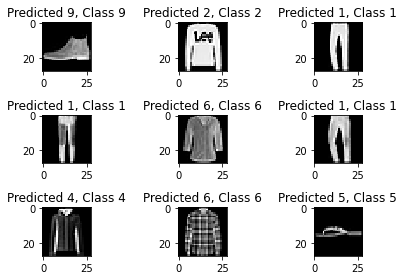

In [42]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 833 incorrect labels


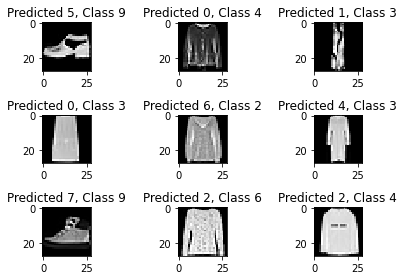

In [44]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

##### Classification Report
Classification report will help us in identifying the misclassified classes in more detail.

In [45]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.89      0.84      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.86      0.91      0.88      1000
     Class 3       0.93      0.91      0.92      1000
     Class 4       0.91      0.81      0.86      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.80      0.76      0.78      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

